In [1]:
from skimage import io
from pylab import *
import cv2

1. Convolution & Cross-Correlation

A. Mask is asymmetric

In [2]:
import numpy as np
from scipy.signal import correlate, convolve

In [3]:
a = np.array([
    [1, 2, 0, 0], 
    [5, 3, 0, 4], 
    [0, 0, 0, 7],
    [9, 3, 0, 0]
])

p = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 1, 1]
])

In [4]:
correlate(a, p, mode = "valid") # Move kernel left to right then top to down. Position, multiply and sum. 

array([[ 3, 11],
       [12, 14]])

In [5]:
convolve(a, p, mode = "valid") # Rotate kernel by 180 degrees and then perform as above.

array([[11,  5],
       [17, 10]])

In [6]:
# Cross check
q = np.array([
    [1,1,1],
    [1,1,0],
    [1,0,0]
])
correlate(a, p, mode = "valid")

array([[ 3, 11],
       [12, 14]])

Special Case: Matrix is impulse

In [7]:
impulse = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0]
])

p = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

In [8]:
correlate(impulse, p, mode = "valid") # Kernel is rotated by 180 degrees.

array([[0, 0, 0, 0, 0],
       [0, 9, 8, 7, 0],
       [0, 6, 5, 4, 0],
       [0, 3, 2, 1, 0],
       [0, 0, 0, 0, 0]])

In [9]:
convolve(impulse, p, mode = "valid") # Kernel obtained again.

array([[0, 0, 0, 0, 0],
       [0, 1, 2, 3, 0],
       [0, 4, 5, 6, 0],
       [0, 7, 8, 9, 0],
       [0, 0, 0, 0, 0]])

B. Mask is symmetric

In [10]:
a = np.array([
    [1, 2, 0, 0], 
    [5, 3, 0, 4], 
    [0, 0, 0, 7],
    [9, 3, 0, 0]
])

p = np.array([
    [1, 4, 1],
    [4, 2, 4],
    [1, 4, 1]
])

In [11]:
correlate(a, p, mode = "valid")

array([[35, 37],
       [38, 38]])

In [12]:
convolve(a, p, mode = "valid") # Convolve and correlate have same output.

array([[35, 37],
       [38, 38]])

In [13]:
# Note: another convolve2d handles boundary padding as follows:
# 1. wrap: Top to bottom and left to right continue
# 2. symm: Take reflection
# 3. fill: Putting fixed number 

2. Sharpening

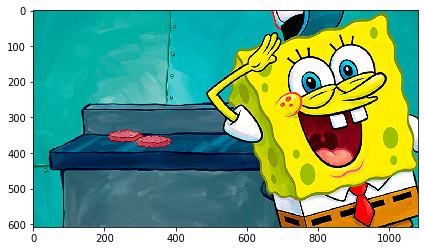

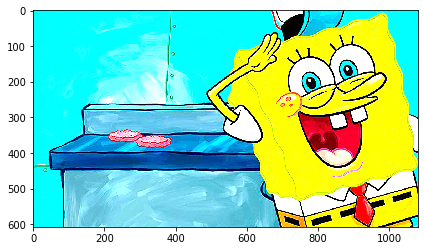

In [16]:
kernel_imp = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]
])

kernel_avg = np.ones((5, 5))/25

k = 3

kernel = k*kernel_imp - kernel_avg

img = io.imread("spongebob.jpg")
img_sharp = cv2.filter2D(img, -1, kernel) # correlate

figure(0)
io.imshow(img)
figure(1)
io.imshow(img_sharp)

3. Edge Detection

A. Horizontal

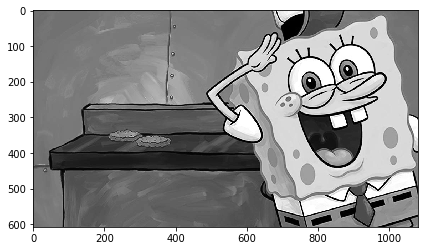

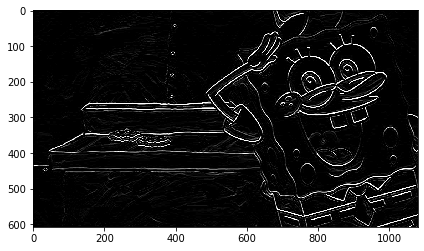

In [17]:
img = cv2.imread("spongebob.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Sobel
kernel_hor = np.array([
    [ 1,  2,  1],
    [ 0,  0,  0],
    [-1, -2, -1]
])

# # Prewitt
# kernel_hor = np.array([
#     [ 1,  1,  1],
#     [ 0,  0,  0],
#     [-1, -1, -1]
# ])

# # Roberts
# kernel_hor = np.array([
#     [ 1,  0],
#     [ 0, -1]
# ])

img_hor = cv2.filter2D(img, -1, kernel_hor)

figure(0)
io.imshow(img)
figure(1)
io.imshow(img_hor)

B. Vertical

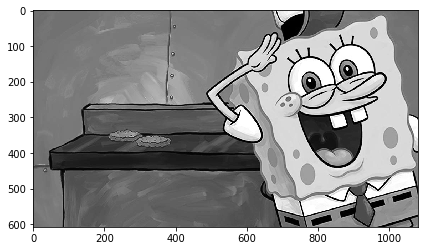

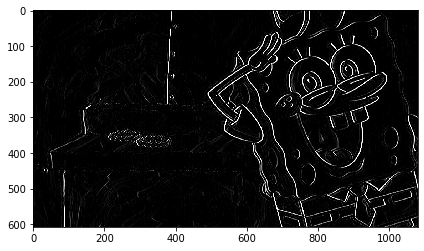

In [18]:
img = cv2.imread("spongebob.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Sobel
kernel_ver = np.array([
    [-1, 0,  1],
    [-2, 0,  2],
    [-1, 0,  1]
])

# # Prewitt
# kernel_ver = np.array([
#     [-1, 0,  1],
#     [-1, 0,  1],
#     [-1, 0,  1]
# ])

# #Roberts
# kernel_ver = np.array([
#     [ 0, 1],
#     [-1, 0]
# ])

img_ver = cv2.filter2D(img, -1, kernel_ver)

figure(0)
io.imshow(img)
figure(1)
io.imshow(img_ver)

In [26]:
# Observation: 
# A vertically focused filter detects vertical edges and horizontally focused filter detects horizontal edges.

# Typically, an equally weighted combination of horizontal and vertical are used for overall edge detection.

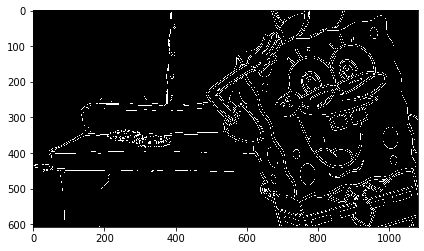

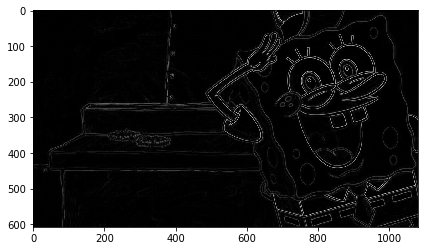

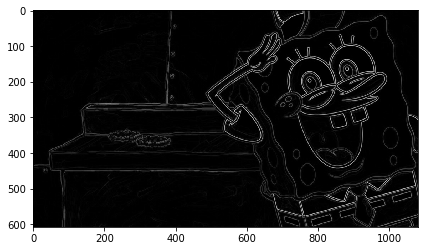

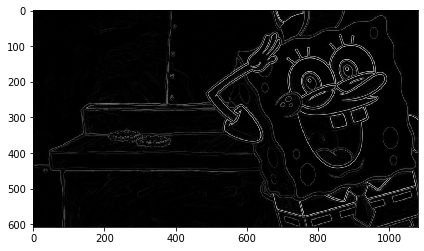

In [27]:
from skimage.filters import roberts, sobel, prewitt

# Define image path
# Read image
img = cv2.imread("spongebob.jpg")
# Convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
    
    
img_canny = cv2.Canny(img, 100, 200)
img_roberts = roberts(img)
img_sobel = sobel(img)
img_prewitt  = prewitt(img)



# Display images
figure(0)
io.imshow(img_canny)
figure(1)
io.imshow(img_roberts)
figure(2)
io.imshow(img_sobel)
figure(3)
io.imshow(img_prewitt)

4. Cropping

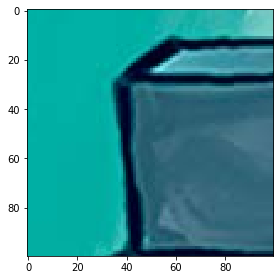

In [40]:
img = cv2.imread("spongebob.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_crop = img[250:350, 100:200]
io.imshow(img_crop)

5. Template matching

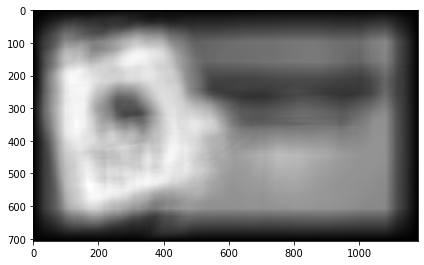

In [46]:
img = cv2.imread("spongebob.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
img_crop = img[250:350, 100:200]
img_crop = img_crop/255 # Normalized

img_cor = correlate(img_crop, img)
img_cor = cv2.normalize(img_cor, None, 0, 1, cv2.NORM_MINMAX)

io.imshow(img_cor)

In [47]:
# Observation:
# On performing cross-correlation, reigions in image which are representative of filter become prominent.
# This is used for object detection.

More on Edge Detection

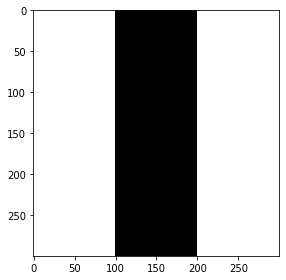

In [48]:
# Make dummy image
scanline = np.array([[255]*100, [0]*100, [255]*100], dtype = uint8).ravel()
img = scanline
for i in range(299):
    img = np.vstack((img, scanline)) 
    
io.imshow(img)

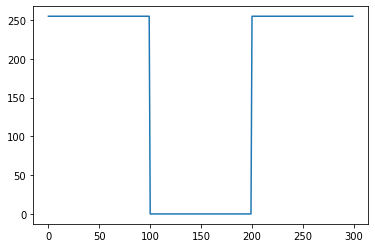

In [49]:
import matplotlib.pyplot as plt 
plt.plot(scanline)

Find derivarive of scanline making discrete approximation

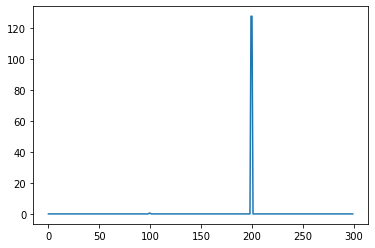

In [50]:
# df/dx = f(x+1) - f(x)
scanline_grad = np.gradient(scanline)
plt.plot(scanline_grad)

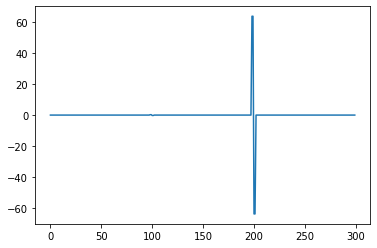

In [51]:
# d2f/dx2 = f(x+1) + f(x-1) - 2f(x)
scanline_grad2 = np.gradient(scanline_grad)
plt.plot(scanline_grad2)

In [52]:
# In an actual image, we take partial derivatives along both axes- df/dx and df/dy.
# direction = tan-1 (df/dy / df/dx)
# magnitude = sqrt ((df/dx)2 + (df/dy)2)

# Property: 
# 1. D(img*kernel) = D(img)*kernel = img*D(kernel) where D means derivative.
# 2. D2(img*kernel) = D2(img)*kernel = img*D2(kernel) where D2 means second derivative.

# We know that we can find regions in the image that represent the kernel.
# If we take a Gaussian kernel with D2(kernel) followed by cross correlation with img, then
# the edges should become apparent.

# D2(k) = d2(k)/dx2 + d2(k)/dy2 i.e. Laplacian of Gaussian or Laplacian Filter

# The following Laplacian filters are commonly used:

# # 1.
# lap = np.array([
#     [-1, -1, -1],
#     [-1,  8, -1],
#     [-1, -1, -1]
# ])

# # 2.
# lap = np.array([
#     [ 0, -1,  0],
#     [-1,  4, -1],
#     [ 0, -1,  0]
# ])

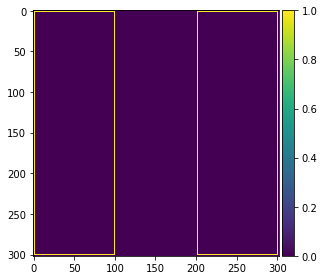

In [56]:
lap = np.array([
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
])

img_cor = correlate(lap, img)
img_cor = cv2.normalize(img_cor, None, 0, 1, cv2.NORM_MINMAX)

io.imshow(img_cor)

In [57]:
# In the above image only edges are apparent.

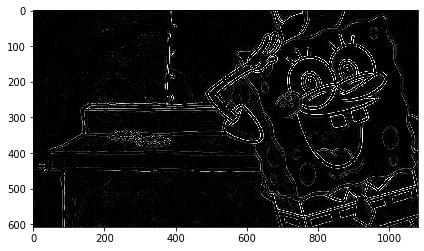

In [58]:
img = cv2.imread("spongebob.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

lap = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

img_cor = cv2.filter2D(img, -1, lap)
img_cor = cv2.normalize(img_cor, None, 0, 255, cv2.NORM_MINMAX)

io.imshow(img_cor)

In [ ]:
# Canny's edge detection is a refined version of this.